In [3]:
#Clustering de un conjunto de datos con datos mezclados usando K-Modes
#Benjamin Pastor
#Plataforma: Colab

import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/marketing_campaign.csv', sep=';', low_memory=False)
print(df.head())
print(df.info())


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [9]:
#MissingValues
df.isnull().sum().sort_values(ascending=False)
#Eliminamos espacios blanco en columnas
df.columns = df.columns.str.replace(' ', '')
#Transofmamos income a numerico


#Sustituir valores faltantes con la media del rango
df['Income'] = df['Income'].fillna(df['Income'].median())



In [3]:
#Eliminar anteriores a 1900
df = df[df['Year_Birth'] > 1900].reset_index(drop=True)


In [4]:
#Transforma date to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


In [5]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 36983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 36983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 36983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 36983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 36983.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 532, cost: 35602.0
Run 1, iteration: 2/100, moves: 120, cost: 35601.0
Run 1, iteration: 3/100, moves: 0, cost: 35601.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/10

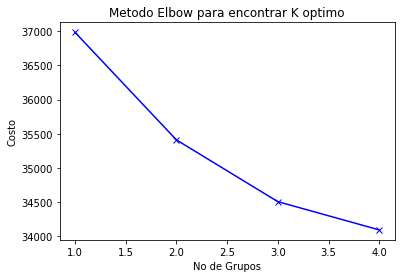

In [6]:

#determinar el número óptimo de grupos y para eso usaremos la técnica del codo o técnica elbow:
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
#Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
  kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose = 1)
  kmode.fit_predict(df)
  cost.append(kmode.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No de Grupos')
plt.ylabel('Costo')
plt.title('Metodo Elbow para encontrar K optimo')
plt.show()


In [7]:
#Construimos el modelo basado en el valor arrojado por el métido de la curva de Elbow. Se toma la quiebra o codeo de la curva
kmode = KModes(n_clusters=3, init= 'random', n_init = 5, verbose=1)
#Hacemos el agrupamiento con el modelo anterior
clusters = kmode.fit_predict(df)
#Insertamos una columna en el dataframe que contiene el numero de cluster que le fue asigando
df.insert(0, "Cluster", clusters, True)
df

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 550, cost: 34700.0
Run 1, iteration: 2/100, moves: 59, cost: 34695.0
Run 1, iteration: 3/100, moves: 0, cost: 34695.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 520, cost: 34889.0
Run 2, iteration: 2/100, moves: 96, cost: 34885.0
Run 2, iteration: 3/100, moves: 0, cost: 34885.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 674, cost: 34872.0
Run 3, iteration: 2/100, moves: 282, cost: 34790.0
Run 3, iteration: 3/100, moves: 111, cost: 34776.0
Run 3, iteration: 4/100, moves: 1, cost: 34776.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 950, cost: 34560.0
Run 4, iteration: 2/100, moves: 201, cost: 34548.0
Run 4, iteration: 3/100, moves: 12, cost: 34548.0
Init: initializing centroi

,Cluster,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,7,0,0,0,0,0,0,3,11,1
1,0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,5,0,0,0,0,0,0,3,11,0
2,1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,4,0,0,0,0,0,0,3,11,0
3,2,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,6,0,0,0,0,0,0,3,11,0
4,1,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,0,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,...,5,0,0,0,0,0,0,3,11,0
2233,0,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,...,7,0,0,0,1,0,0,3,11,0
2234,1,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,6,0,1,0,0,0,0,3,11,0
2235,0,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,...,3,0,0,0,0,0,0,3,11,0


In [8]:
#Resumen casos o clientes en cada grupo
cluster0 = df[df['Cluster']==0]
cluster1 = df[df['Cluster']==1]
cluster2 = df[df['Cluster']==2]

print("Cluster 0: ", len(cluster0))
print("Cluster 1: ", len(cluster1))
print("Cluster 2: ", len(cluster2))

print("Total: ", len(cluster0)+len(cluster1)+len(cluster2))

Cluster 0:  993
Cluster 1:  586
Cluster 2:  658
Total:  2237
